In [1]:
from PySeirCampus.construct_SEIRPublicData import *
import pandas as pd
import copy
import math

# Import Distance Matrix

In [2]:
distance_matrix_file = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/DistanceMatrix/distance_matrix1.csv"

# Create Distance Matrix DataFrame

In [3]:
distance_matrix_df = pd.read_csv(distance_matrix_file, header = None)

for index, row in distance_matrix_df.iterrows():
    for column in range(len(row)):           
        distance_matrix_df.iloc[index,column] /= 1000 # from meter to km 

distance_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.185042,0.671059,1.085272,1.485059,0.184150,0.261059,0.671059,1.085272,1.485059,...,1.076982,1.077059,1.487059,1.901272,2.301059,1.484982,1.485059,1.895059,2.309272,2.709059
1,0.205025,0.000000,0.204975,0.689847,1.089634,0.275672,0.184281,0.275634,0.689847,1.089634,...,1.091672,1.091672,1.091634,1.505847,1.905634,1.499672,1.499672,1.499634,1.913847,2.313634
2,0.687249,0.207132,0.000000,0.207081,0.677100,0.687351,0.277351,0.184445,0.277313,0.677100,...,1.503351,1.093351,1.093351,1.093313,1.493100,1.911351,1.501351,1.501351,1.501313,1.901100
3,1.096228,0.686228,0.199917,0.000000,0.199870,1.096328,0.686328,0.272115,0.184607,0.272080,...,1.912328,1.502328,1.088115,1.088115,1.088080,2.320328,1.910328,1.496115,1.496115,1.496080
4,1.498383,1.088383,0.674170,0.202963,0.000000,1.498454,1.088454,0.674240,0.274454,0.184745,...,2.314454,1.904454,1.490240,1.090454,1.090527,2.722454,2.312454,1.898240,1.498454,1.498527
5,0.203975,0.275315,0.685315,1.099528,1.499315,0.000000,0.184912,0.685315,1.099528,1.499315,...,0.683235,0.683352,1.093352,1.507565,1.907352,1.091235,1.091352,1.501352,1.915565,2.315352
6,0.289207,0.204005,0.289215,0.703428,1.103215,0.204995,0.000000,0.205005,0.703428,1.103215,...,0.697200,0.697200,0.697208,1.111421,1.511208,1.105200,1.105200,1.105208,1.519421,1.919208
7,0.700704,0.290704,0.204005,0.290712,0.690498,0.700697,0.207102,0.000000,0.207112,0.690498,...,1.108697,0.698697,0.698697,0.698705,1.098491,1.516697,1.106697,1.106697,1.106705,1.506491
8,1.109824,0.699824,0.285611,0.204005,0.285618,1.109817,0.699817,0.199888,0.000000,0.199898,...,1.517817,1.107817,0.693603,0.693603,0.693610,1.925817,1.515817,1.101603,1.101603,1.101610
9,1.511878,1.101878,0.687665,0.287878,0.204032,1.511878,1.101878,0.687620,0.203088,0.000000,...,1.919833,1.509833,1.095620,0.695833,0.695955,2.327833,1.917833,1.503620,1.103833,1.103956


# Create Distance Decay Matrix DataFrame

In [4]:
# moving_speed = 3.0 # unist is km/hr
# F_df = distance_matrix_df

# for index, row in F_df.iterrows():
#     for column in range(len(row)):
#         distance = row[column]            
#         time = distance/moving_speed
#         F = pow(time, -3.993) * math.exp(-0.019 * time)      
#         F_df.iloc[index,column] = F

# F_df

In [5]:
# a = F_df.iloc[0,:]
# a = a.to_dict()
# a = sorted(a.items(), key=lambda x:x[1], reverse=True)
# a = dict(a)
# a

# Import Facility Allocation Map 

In [72]:
#facility_allocation_file = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/GitHub/CityEpidemiologyModeling/SEIR-Campus-master/FacilityAllocation/Grid_Uni_R_Rad_F_25.csv"

#facility_allocation_file = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/FacilityAllocation/1.Center_Gradient_Grid_Uni_R_Rad_F_25.csv"
facility_allocation_file = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/FacilityAllocation/2.Right_Linear_Grid_Uni_R_Rad_F_25.csv"
#facility_allocation_file = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/FacilityAllocation/3.TwoSides_Linear_Grid_Uni_R_Rad_F_25.csv"
#facility_allocation_file = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/FacilityAllocation/4.Grid_Uni_R_Uni_F_25.csv"



# Facity Allocation DataFrame

In [73]:
total_population = 100000
total_job_count = 30000

In [74]:
# Uniformly distributed facility

ori_facility_df = generateJobStatusDataFrame(facility_allocation_file, total_job_count, "BlockGroup", 1)
block_ids = ori_facility_df.loc[:,"BLOCK_ID"]
facility_ratio = [1/len(block_ids) for i in range(0, len(block_ids))]
facility_job_count = [int(total_job_count/len(block_ids)) for i in range(0, len(block_ids))]

facility_data = {"BLOCK_ID":block_ids, "Normalized_Ratio":facility_ratio,\
                   "JOB_COUNT":facility_job_count}

facility_df = pd.DataFrame(facility_data)

facility_ratio_sum = sum(facility_df.loc[:,"Normalized_Ratio"])
facility_df

,BLOCK_ID,Normalized_Ratio,JOB_COUNT
0,0,0.04,1200
1,1,0.04,1200
2,2,0.04,1200
3,3,0.04,1200
4,4,0.04,1200
5,5,0.04,1200
6,6,0.04,1200
7,7,0.04,1200
8,8,0.04,1200
9,9,0.04,1200


In [75]:
# # Non-uniformly distributed facility

# facility_df = generateJobStatusDataFrame(facility_allocation_file, total_job_count, "BlockGroup", 1)
# facility_ratio_sum = sum(facility_df.loc[:,"Normalized_Ratio"])
# facility_df

In [76]:
facility_ratio_sum

1.0000000000000002

In [77]:
# meeting_type_id_count_dic = get_JOB_TYPE_ID_COUNT(facility_df,1)
# meeting_type_id_count_dic

# Population Distribution DataFrame

In [78]:
# # Uniformly distributed population

# block_ids = facility_df.loc[:,"BLOCK_ID"]
# block_population_ratio = [1/len(block_ids) for i in range(0, len(block_ids))]
# block_population = [int(total_population/len(block_ids)) for i in range(0, len(block_ids))]

# population_data = {"BLOCK_ID":block_ids, "Normalized_Ratio":block_population_ratio,\
#                    "POPULATION":block_population}
# population_df = pd.DataFrame(population_data)
# population_df

In [79]:
# Non-uniform distributed population

block_ids = ori_facility_df.loc[:,"BLOCK_ID"]
block_population_ratio = ori_facility_df.loc[:,"Normalized_Ratio"]
block_population = [int(total_population*ori_facility_df.loc[i,"Normalized_Ratio"]) for i in range(0, len(block_ids))]

population_data = {"BLOCK_ID":block_ids, "Normalized_Ratio":block_population_ratio,\
                   "POPULATION":block_population}
population_df = pd.DataFrame(population_data)
population_df

,BLOCK_ID,Normalized_Ratio,POPULATION
0,0,0.003633,363
1,1,0.014016,1401
2,2,0.029259,2925
3,3,0.051639,5163
4,4,0.081453,8145
5,5,0.004036,403
6,6,0.015573,1557
7,7,0.032510,3250
8,8,0.057377,5737
9,9,0.090503,9050


# Destination Sampling Strategy


Using Distance Decay Matrix to limit how far a person can travel. Within this person's travel radius, using Facility Distribution Map as probablistic model to sample the next destination for this person

In [80]:
# # select blocks within the radius of proximity
# def getBlocksWithinProximity(resident_block_id,
#                              distance_threshold,
#                              moving_speed,
#                              population_df,
#                              facility_df,
#                              dacay_df):    
#     distance_list = dacay_df.iloc[resident_block_id,:]
    
#     # use distance_threshold to compute distance_decay_threshold
#     # use distance_decay_threshold to exclude blocks outside activity range
#     time_limit = distance_threshold / moving_speed 
#     distance_dacay_threshold = pow(time_limit, -3.993) * math.exp(-0.019 * time_limit)    
#     blocks_WithinProximity = [i for i in range(len(distance_list)) if distance_list[i] >= distance_dacay_threshold ]
#     return blocks_WithinProximity


# # construct roulette wheel for a traveler in block of resident_block_id
# def constructRouletteWheel(resident_block_id,
#                            blocks_WithinProximity,
#                            population_df,
#                            facility_df):   
#     # the population of this resident's block
#     block_population = population_df.loc[resident_block_id, "POPULATION"]
#     roulette = {}
#     # first part of the roulette wheel will be the block population
#     # then aggregate value from the block population
#     roulette[-1] = block_population 
#     roulette_part_sum = block_population
    
#     for block in blocks_WithinProximity:
#         facility_job_count = facility_df.loc[block, "JOB_COUNT"]        
#         roulette_part_sum += facility_job_count 
#         roulette[block] = roulette_part_sum        
#     return roulette

# # create a route for a traveler in block of resident_block_id
# def createRoute(resident_block_id, 
#                 block_roulette, 
#                 dest_num):    
#     #in the scope of a people
#     route = [("HOME", resident_block_id, 1)]
        
#     for i in range(2,dest_num):
#         # sample a number from the roulette wheel        
#         myKeys = list(block_roulette.keys())
#         myKeys.sort()
#         total_population_within_proximity = block_roulette[myKeys[len(myKeys)-1]]
#         sampled_number = random.randrange(0, total_population_within_proximity)
        
#         # Check which roulette part the sampled number is in.
#         # The total number of roulette parts is equal to the number of blocks plus one
#         # traverse through the roulette wheel
#         # to find out which part the sampled number is in
#         for k in myKeys:
#             roulette_part_limit = block_roulette[k]
#             if sampled_number <= roulette_part_limit:
#                 sampled_block_id = None
#                 sampled_meeting_type = None
                
#                 if k == -1:
#                     sampled_block_id = resident_block_id
#                     sampled_meeting_type = "HOME"
#                 else:    
#                     sampled_meeting_type = "Facilities"
#                     sampled_block_id = k                    
    
#                 route.append((sampled_meeting_type, sampled_block_id, i))
#                 break
                    
#     route.append(("HOME", resident_block_id, dest_num))
#     return route

In [81]:
def getBlocksWithinProximity(resident_block_id,
                             distance_threshold, # km
                             distance_df):    
    """
    select blocks within the radius of proximity
    """
    distance_list = distance_df.iloc[resident_block_id,:]

    # use distance_threshold to exclude blocks outside activity range    
    blocks_WithinProximity = [i for i in range(len(distance_list)) if distance_list[i] <= distance_threshold ]
    return blocks_WithinProximity


def constructRouletteWheel(resident_block_id,
                           blocks_WithinProximity,
                           facility_df):   
    """
    construct roulette wheel for a traveler in the block of resident_block_id
    """
    roulette = {}
    # aggregate value from the block facility job count
    roulette_part_sum = 0
    
    for block in blocks_WithinProximity:
        facility_job_count = facility_df.loc[block, "JOB_COUNT"]        
        roulette_part_sum += facility_job_count 
        roulette[block] = roulette_part_sum        
    return roulette


def createRoute(resident_block_id, 
                block_roulette,
                prob_stay_home,
                dest_num=3):    
    """
    create a route for a traveler in block of resident_block_id
    """
    assert dest_num == 3, "dest_num should be 3"
    
    #in the scope of a people
    route = [("HOME", resident_block_id, 1)]
    prob_stay_home_list = np.random.binomial(n=1, p=prob_stay_home, size=dest_num-2)
    
    for i in range(dest_num-2): # dest_num - 2: cuz fist and the last destination is determined,
                                # we only need to determine 2nd,3rd,...,(dest_num-1)th destination 
            
        if prob_stay_home_list[i]==1:
            route.append(("HOME", resident_block_id, i+2)) # i+2: destination index starts at 1, not 0
            continue
            
        # sample a number from the roulette wheel        
        blocks_in_radius = list(block_roulette.keys()) # ids of blocks_in_radius
        blocks_in_radius.sort()
        total_facility_within_proximity = block_roulette[blocks_in_radius[len(blocks_in_radius)-1]]
        #sampled_number = random.randrange(0, total_facility_within_proximity)
        sampled_number = np.random.uniform(0, total_facility_within_proximity, size=1)
        
        # Check which roulette part the sampled number is in.
        # The total number of roulette parts is equal to the number of blocks plus one
        # traverse through the roulette wheel
        # to find out which part the sampled number is in
        for k in blocks_in_radius:
            roulette_part_limit = block_roulette[k]
            if sampled_number <= roulette_part_limit:                
                sampled_meeting_type = "Facilities"
                sampled_block_id = k                   
    
                route.append((sampled_meeting_type, sampled_block_id, i+2)) # i+2: destination index starts at 1, not 0
                break
                    
    route.append(("HOME", resident_block_id, dest_num))
    return route


def createRoute1(resident_block_id, 
                prob_stay_home,
                dest_num,
                distance_threshold, # km
                distance_matrix_df,
                facility_df):    
    """
    create a route for a traveler in block of resident_block_id
    """
    assert dest_num > 2, "dest_num should be bigger than 2."
    
    #in the scope of a people
    route = [("HOME", resident_block_id, 1)]
    prob_stay_home_list = np.random.binomial(n=1, p=prob_stay_home, size=dest_num-2)
    home_block_id = resident_block_id
    
    for i in range(dest_num-2): # dest_num - 2: cuz fist and the last destination is determined,
                                # we only need to determine 2nd,3rd,...,(dest_num-1)th destination 
            
        if prob_stay_home_list[i]==1:
            route.append(("HOME", home_block_id, i+2)) # i+2: destination index starts at 1, not 0
            continue
        
        # create a roulette wheel
        blocks_WithinProximity = getBlocksWithinProximity(resident_block_id, 
                                                          distance_threshold, 
                                                          distance_matrix_df)
        rouletteWheel = constructRouletteWheel(resident_block_id, 
                                               blocks_WithinProximity, 
                                               facility_df)     
        
        # sample a number from the roulette wheel        
        blocks_in_radius = list(rouletteWheel.keys()) # ids of blocks_in_radius
        blocks_in_radius.sort()
        total_facility_within_proximity = rouletteWheel[blocks_in_radius[len(blocks_in_radius)-1]]
        sampled_number = np.random.uniform(0, 
                                           total_facility_within_proximity, 
                                           size=1)
        
        # Check which roulette part the sampled number is in.
        # The total number of roulette parts is equal to the number of blocks plus one
        # traverse through the roulette wheel
        # to find out which part the sampled number is in
        for k in blocks_in_radius:
            roulette_part_limit = rouletteWheel[k]
            if sampled_number <= roulette_part_limit:                
                sampled_meeting_type = "Facilities"
                sampled_block_id = k                   
    
                route.append((sampled_meeting_type, sampled_block_id, i+2)) # i+2: destination index starts at 1, not 0
                break
            
        resident_block_id = sampled_block_id        
        
    route.append(("HOME", home_block_id, dest_num))
    return route


In [82]:
blocks_WithinProximity = getBlocksWithinProximity(0, 1.0, distance_matrix_df)
blocks_WithinProximity

[0, 1, 2, 5, 6, 7, 10, 11]

In [83]:
rouletteWheel = constructRouletteWheel(0, blocks_WithinProximity, facility_df)
rouletteWheel

{0: 1200, 1: 2400, 2: 3600, 5: 4800, 6: 6000, 7: 7200, 10: 8400, 11: 9600}

In [84]:
prob_stay_home = 0.5

a = createRoute(0, rouletteWheel, prob_stay_home)
a

[('HOME', 0, 1), ('HOME', 0, 2), ('HOME', 0, 3)]

In [86]:
r = createRoute1(0, prob_stay_home, 10, 1.0, distance_matrix_df, facility_df)
r

[('HOME', 0, 1),
 ('HOME', 0, 2),
 ('Facilities', 5, 3),
 ('HOME', 0, 4),
 ('Facilities', 5, 5),
 ('Facilities', 16, 6),
 ('Facilities', 21, 7),
 ('HOME', 0, 8),
 ('Facilities', 23, 9),
 ('HOME', 0, 10)]

In [87]:
# 3 destinations per person
dest_num = 3 # the count of destination per trip
distance_threshold = 1.0 # unit is km
prob_stay_home = 0.5 # prob of a person stays at home

In [88]:
# adjusted_F_df = F_df

# time_thr = distance_threshold/moving_speed
# decay_thr = pow(time_thr, -3.993) * math.exp(-0.019 * time_thr)

# for index, row in adjusted_F_df.iterrows():
#     for column in range(len(row)):
#         distance = row[column]            
#         if distance >= decay_thr:      
#             continue
#         else:
#             adjusted_F_df.iloc[index,column] = 0

# adjusted_F_df

In [89]:
#adjusted_F_df.iloc[0,:]

# Create routes for every residents in the city

In [90]:
%%time

all_trips =[]
iteration = 0

for block_id,row in population_df.iterrows():
    #in the scope of a block

    # how many residents in the block
    # uniformly distributed residents
    residents_in_block = int(row["POPULATION"])
    
    for j in range(0, residents_in_block):
        #in the scope of a people
        
        blocks_WithinProximity = getBlocksWithinProximity(block_id, 
                                                          distance_threshold, 
                                                          distance_matrix_df)
        rouletteWheel = constructRouletteWheel(block_id, 
                                               blocks_WithinProximity, 
                                               facility_df)
        route = createRoute(block_id, rouletteWheel, prob_stay_home, dest_num)
        
        dic = {}
        dic["Resident ID"] = iteration
        dic["Route"] = route
        all_trips.append(dic)
        iteration += 1

CPU times: total: 22.9 s
Wall time: 22.9 s


In [91]:
all_trips

[{'Resident ID': 0,
  'Route': [('HOME', 0, 1), ('Facilities', 6, 2), ('HOME', 0, 3)]},
 {'Resident ID': 1,
  'Route': [('HOME', 0, 1), ('Facilities', 0, 2), ('HOME', 0, 3)]},
 {'Resident ID': 2, 'Route': [('HOME', 0, 1), ('HOME', 0, 2), ('HOME', 0, 3)]},
 {'Resident ID': 3,
  'Route': [('HOME', 0, 1), ('Facilities', 5, 2), ('HOME', 0, 3)]},
 {'Resident ID': 4,
  'Route': [('HOME', 0, 1), ('Facilities', 2, 2), ('HOME', 0, 3)]},
 {'Resident ID': 5,
  'Route': [('HOME', 0, 1), ('Facilities', 11, 2), ('HOME', 0, 3)]},
 {'Resident ID': 6, 'Route': [('HOME', 0, 1), ('HOME', 0, 2), ('HOME', 0, 3)]},
 {'Resident ID': 7, 'Route': [('HOME', 0, 1), ('HOME', 0, 2), ('HOME', 0, 3)]},
 {'Resident ID': 8, 'Route': [('HOME', 0, 1), ('HOME', 0, 2), ('HOME', 0, 3)]},
 {'Resident ID': 9, 'Route': [('HOME', 0, 1), ('HOME', 0, 2), ('HOME', 0, 3)]},
 {'Resident ID': 10,
  'Route': [('HOME', 0, 1), ('HOME', 0, 2), ('HOME', 0, 3)]},
 {'Resident ID': 11,
  'Route': [('HOME', 0, 1), ('Facilities', 0, 2), ('HOM

# Create Meetings

In [92]:
%%time

all_meeting_types = ["HOME", "Facilities"]
meetings = constructSEIR_PublicData(all_trips, 
                                    all_meeting_types,
                                    dest_num,
                                    meeting_duration = 5,
                                    start_date="9/2/2020", 
                                    end_date="11/13/2021")

CPU times: total: 11.1 s
Wall time: 11.1 s


In [93]:
meetings

[{'meeting': {'id': 'HOME 0.1',
   'info': {'name': 'HOME 0.1'},
   'meets': [('9/2/2020',
     '11/13/2021',
     ['M', 'T', 'W', 'R', 'F', 'S', 'U'],
     5)],
   'members': [0,
    1,
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    28,
    29,
    30,
    31,
    32,
    33,
    34,
    35,
    36,
    37,
    38,
    39,
    40,
    41,
    42,
    43,
    44,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
    61,
    62,
    63,
    64,
    65,
    66,
    67,
    68,
    69,
    70,
    71,
    72,
    73,
    74,
    75,
    76,
    77,
    78,
    79,
    80,
    81,
    82,
    83,
    84,
    85,
    86,
    87,
    88,
    89,
    90,
    91,
    92,
    93,
    94,
    95,
    96,
    97,
    98,
    99,
    100,
    101,
    102,
    103,
 

In [94]:
meeting_names = []
s = 0
for meeting in meetings:
    ID = meeting["meeting"]["id"]
    if ".1" in ID: 
        s += len(meeting["meeting"]["members"])
    meeting_names.append(ID)

print(len(meeting_names))
meeting_names

100


['HOME 0.1',
 'HOME 0.2',
 'HOME 0.3',
 'HOME 1.1',
 'HOME 1.2',
 'HOME 1.3',
 'HOME 2.1',
 'HOME 2.2',
 'HOME 2.3',
 'HOME 3.1',
 'HOME 3.2',
 'HOME 3.3',
 'HOME 4.1',
 'HOME 4.2',
 'HOME 4.3',
 'HOME 5.1',
 'HOME 5.2',
 'HOME 5.3',
 'HOME 6.1',
 'HOME 6.2',
 'HOME 6.3',
 'HOME 7.1',
 'HOME 7.2',
 'HOME 7.3',
 'HOME 8.1',
 'HOME 8.2',
 'HOME 8.3',
 'HOME 9.1',
 'HOME 9.2',
 'HOME 9.3',
 'HOME 10.1',
 'HOME 10.2',
 'HOME 10.3',
 'HOME 11.1',
 'HOME 11.2',
 'HOME 11.3',
 'HOME 12.1',
 'HOME 12.2',
 'HOME 12.3',
 'HOME 13.1',
 'HOME 13.2',
 'HOME 13.3',
 'HOME 14.1',
 'HOME 14.2',
 'HOME 14.3',
 'HOME 15.1',
 'HOME 15.2',
 'HOME 15.3',
 'HOME 16.1',
 'HOME 16.2',
 'HOME 16.3',
 'HOME 17.1',
 'HOME 17.2',
 'HOME 17.3',
 'HOME 18.1',
 'HOME 18.2',
 'HOME 18.3',
 'HOME 19.1',
 'HOME 19.2',
 'HOME 19.3',
 'HOME 20.1',
 'HOME 20.2',
 'HOME 20.3',
 'HOME 21.1',
 'HOME 21.2',
 'HOME 21.3',
 'HOME 22.1',
 'HOME 22.2',
 'HOME 22.3',
 'HOME 23.1',
 'HOME 23.2',
 'HOME 23.3',
 'HOME 24.1',
 'HOME 2

In [95]:
# output_folder_path = "C:/Users/Administrator.DESKTOP-D3SVMI5/"+\
# "Documents/Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events"

output_folder_path = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/Events"

##########################Write data into a .data file#######################
output_file = output_folder_path + "/" + "meetings" + str(0) + ".data"

# isExist = os.path.exists(output_file)
# if isExist:
#     for j in range(0, 99999999):
#         localName = output_folder_path + "/" + "meetings" + str(j) + ".data"
#         if localName == output_file:
#             continue
            
#         if os.path.exists(localName)==False:
#             output_file = localName
#             break
            
    
o_file = open(output_file,"w")

student_lst = createStudentList(total_population)
for student in student_lst:
    o_file.write(str(student)+"\n")


for meeting in meetings:
    members = meeting["meeting"]["members"]
    o_file.write(str(meeting)+"\n")    

    
o_file.close()

In [96]:
from datetime import datetime, timedelta
from PySeirCampus import *
import os
import re
import seaborn as sb

In [97]:
holiday_list = [(2020, 10, 14)]
holidays = set(datetime(*h) for h in holiday_list)
#semester = Semester('publicdata.data', holidays)

In [98]:
# generated_meetings_folder = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events"

# generated_meetings_folder = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/"+\
#                             "Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events"+\
#                             "/5kMeal_1kHousing_2kRecrea_3kOffice_2kOther"

generated_meetings_folder = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/Events"

meeting_files = os.listdir(generated_meetings_folder) 

#Filtering only the data files.
meetings_files = [generated_meetings_folder + "/" + f for f in meeting_files if f.endswith(".data")] 
meetings_files

['C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/Events/meetings0.data']

In [99]:
semester = Semester(meetings_files[0], holidays)

parameters = Parameters(reps = 30)
parameters.initial_exposure = 1

rate_multiplier = 0
parameters.rate *= (1 + rate_multiplier) # the unit of rate is per minute
#1/(65.6*60*7)

parameters.infection_duration = BasicInfectionDuration(rate_contagious=1/3.5, 
                                                       rate_recovery=1/5)

parameters.start_date = datetime(2020,9,2)
parameters.end_date = datetime(2021,1,13)

parameters.info()

verbose = False
rate = 4e-05
daily_spontaneous_prob = 0
contact_tracing = DefaultContactTracing(no action)
intervention_policy = DefaultInterventionPolicy(no intervention)
infection_duration = <PySeirCampus.BasicInfectionDuration object at 0x000001F468D44580>
quarantine_length = 14
preclass_interaction_time = 0
initial_exposure = 1
preprocess = <function Parameters.__init__.<locals>.<lambda> at 0x000001F478699C10>
repetitions = 30
start_date = 2020-09-02 00:00:00
end_date = 2021-01-13 00:00:00
vaccine_benefit_self = 0.9
vaccine_benefit_others = 0.5


Semester object with 100000 students, 100 courses, and 0 groups.
Course sizes: min 189 , avg 2999.6 , max 9955
Course durations: min 5.0 , avg 5.0 , max 5.0


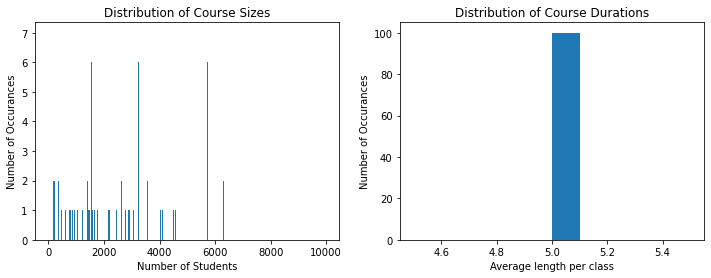

In [100]:
semester.summarize()

Running 30 repetitions.
Initial exposed: 1
Average final exposure count is 98840.73333333334
Sample Standard deviation is: 50.65701662487965
Quarantine: max 0.0 , avg 0.0


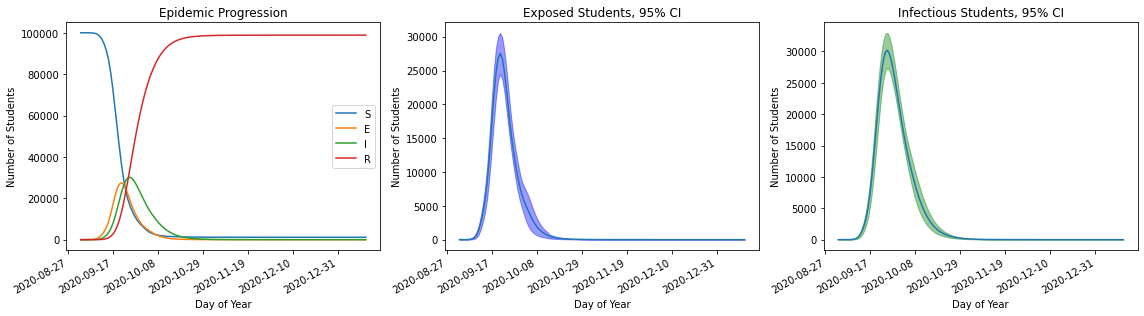

In [101]:
run_repetitions(semester, parameters)

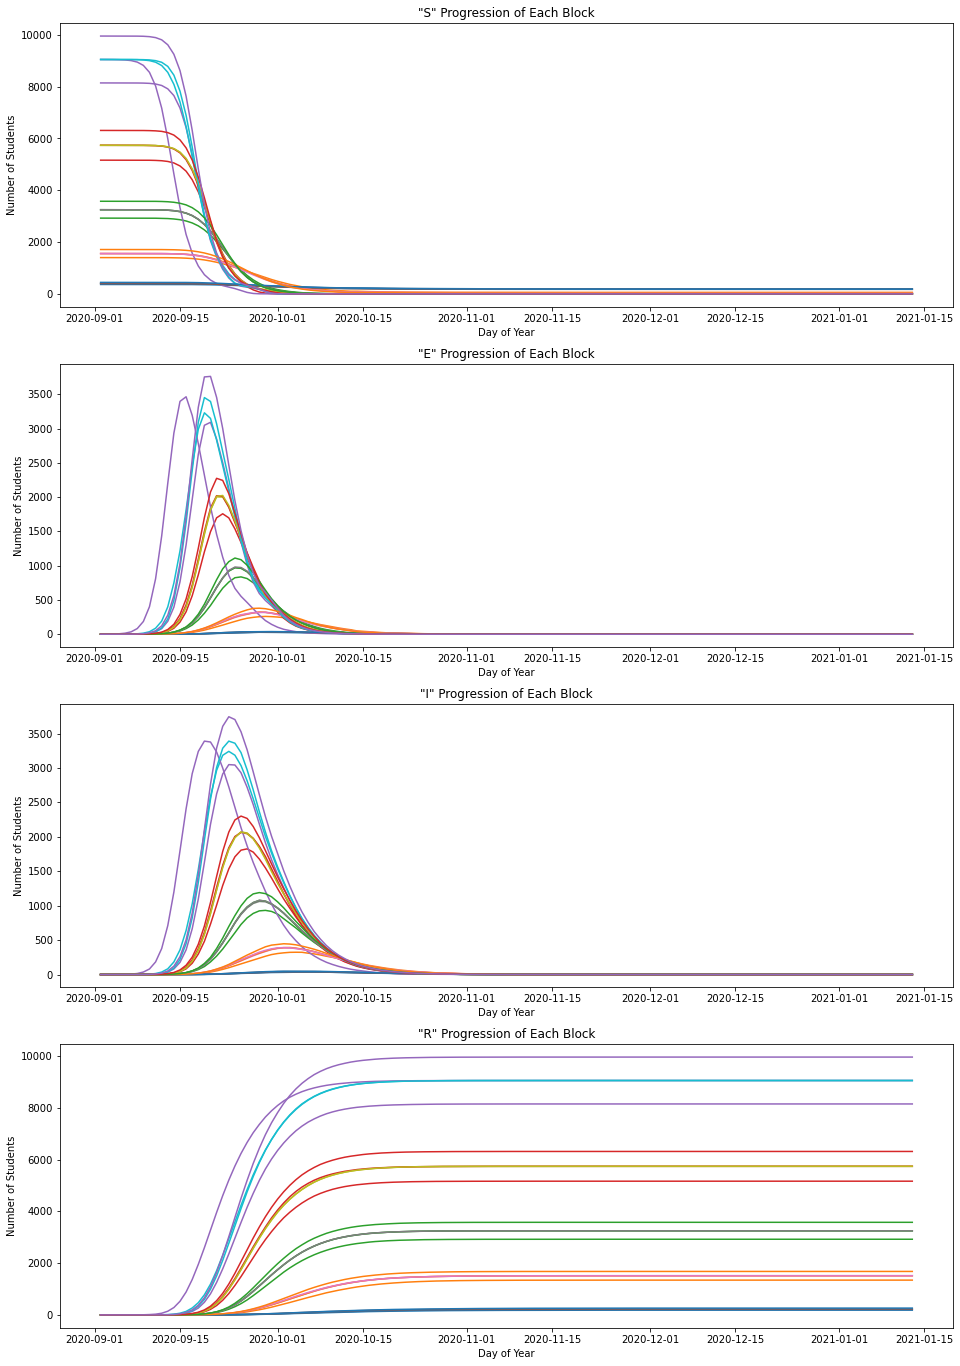

In [103]:
# initial_exposed_students is a list that contains students' id number

#initial_exposed_students = [0]
initial_exposed_students = [50_000]
stats_dic = run_and_specify_ini_exp_students(semester, parameters,
                                             initial_exposed_students)

In [70]:
Ss = {} 
Es = {}
Is = {}
Rs = {}

for block, stats in stats_dic["S_blocks_stats"].items():
        Ss[block] = np.mean(stats,axis=0).tolist()
for block, stats in stats_dic["E_blocks_stats"].items():
        Es[block] = np.mean(stats,axis=0).tolist()
for block, stats in stats_dic["I_blocks_stats"].items():
        Is[block] = np.mean(stats,axis=0).tolist()
for block, stats in stats_dic["R_blocks_stats"].items():
        Rs[block] = np.mean(stats,axis=0).tolist()

stats_dic = {"Ss":Ss, "Es":Es, "Is":Is, "Rs":Rs}

In [71]:
# S_output_folder_path = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/"+\
#                         "Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events/S"
# E_output_folder_path = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/"+\
#                         "Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events/E"
# I_output_folder_path = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/"+\
#                         "Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events/I"
# R_output_folder_path = "C:/Users/Administrator.DESKTOP-D3SVMI5/Documents/"+\
#                         "Jupyter_Notebook/09282022_SEIR/SEIR-Campus-master/events/R"

I_output_folder_path = "C:/Users/ys954/Documents/Github/CityEpidemiologyModeling/SEIR-Campus-master/Propogation/I/"
                        

# S_output_file = S_output_folder_path + ".data"
# E_output_file = E_output_folder_path + ".data"
# I_output_file = I_output_folder_path + ".data"
# R_output_file = R_output_folder_path + ".data"



#trial = "1_Center_Gradient_Grid_Uni_R_Rad_F_25"
#trial = "2_Right_Linear_Grid_Uni_R_Rad_F_25"
#trial = "3_TwoSides_Linear_Grid_Uni_R_Rad_F_25"
#trial = "4_Grid_Uni_R_Uni_F_25"

#trial = "1.1_Center_Gradient_Grid_Uni_R_Rad_F_25"
#trial = "2.1_Right_Linear_Grid_Uni_R_Rad_F_25"
#trial = "3.1_TwoSides_Linear_Grid_Uni_R_Rad_F_25"
#trial = "4.1_Grid_Uni_R_Uni_F_25"


trial = "1_Center_Gradient_Grid_Rad_R_Uni_F_25"
#trial = "2_Right_Linear_Grid_Rad_R_Uni_F_25"
#trial = "3_TwoSides_Linear_Grid_Rad_R_Uni_F_25"
#trial = "4_Grid_Uni_R_Uni_F_25"

#trial = "1.1_Center_Gradient_Grid_Rad_R_Uni_F_25"
#trial = "2.1_Right_Linear_Grid_Rad_R_Uni_F_25"
#trial = "3.1_TwoSides_Linear_Grid_Rad_R_Uni_F_25"
#trial = "4.01_Grid_Uni_R_Uni_F_25"

I_output_file = I_output_folder_path + trial + ".data"

for name, stats in stats_dic.items():
    file = None
    
    if name == "Ss":
        #file = S_output_file
        continue
    elif name == "Es":
        #file = E_output_file
        continue
    elif name == "Is":
        file = I_output_file
    elif name == "Rs":
        #file = R_output_file
        continue
    else:
        raise Exception("There is a typo. file name should choose from ['S','E','I','R']")

        
    o_file = open(file,"w")## choose which file to write

    for key,value in stats.items():
        o_file.write(str(key)+":"+str(value)+"\n") 

    o_file.close()